Import all libraries and functions

In [1]:
from functions import *

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import the dataframe

In [2]:
df_reviews = pd.read_csv('../../data/cleaned/reviews.csv', encoding='utf-8', parse_dates=['creation_timestamp','answer_timestamp'] )
df_reviews = df_reviews.copy()

In [3]:
df_reviews.dtypes

review_id                     object
order_id                      object
score                          int64
title                         object
message                       object
creation_timestamp    datetime64[ns]
answer_timestamp      datetime64[ns]
review_unique_id              object
dtype: object

## Setup Portuguese words 

In [4]:
# Download Portuguese stopwords (ex: "o", "a", "os", "as", "de", "que", "em".)

setup_nltk()
portuguese_stopwords = get_portuguese_stopwords()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
df_reviews['cleaned_review'], df_reviews['emojis'] = zip(*df_reviews['message'].apply(lambda x: clean_text(x, portuguese_stopwords)))

## Sentiment Analysis

#### Emoji Analysis

In [6]:
emoji_counts = df_reviews['emojis'].apply(lambda x: [c for c in x]).explode().value_counts()

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170

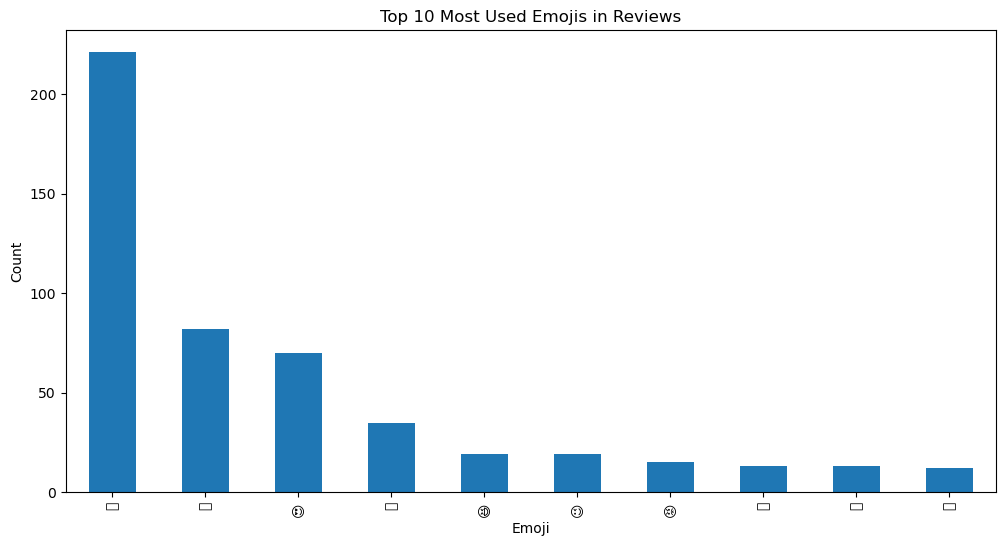

In [7]:
# Visualize emoji distribution

plt.figure(figsize=(12, 6))
emoji_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Used Emojis in Reviews')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.show()

### Word frequency analysis

In [8]:
# Get most common words
all_words = ' '.join(df_reviews['cleaned_review']).split()
valid_words = [word for word in all_words if is_valid_word(word)]
word_counts = Counter(valid_words)
top_words_pt = word_counts.most_common(20)


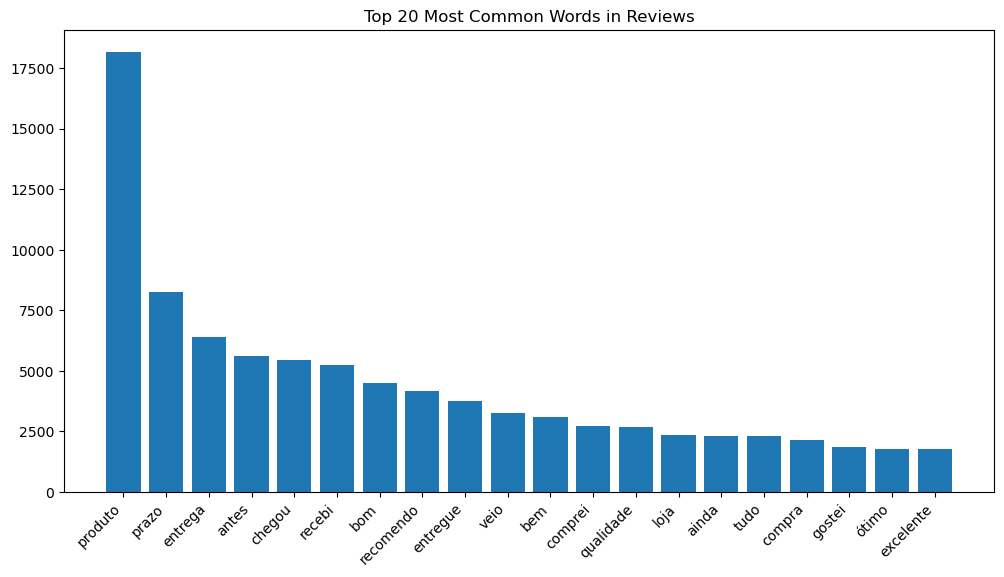

In [9]:
# Visualize
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_pt))
plt.title('Top 20 Most Common Words in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

Get the top words in English

In [10]:
top_words_pt = word_counts.most_common(20)
top_words_en = [(translate_to_english(word), count) for word, count in top_words_pt]

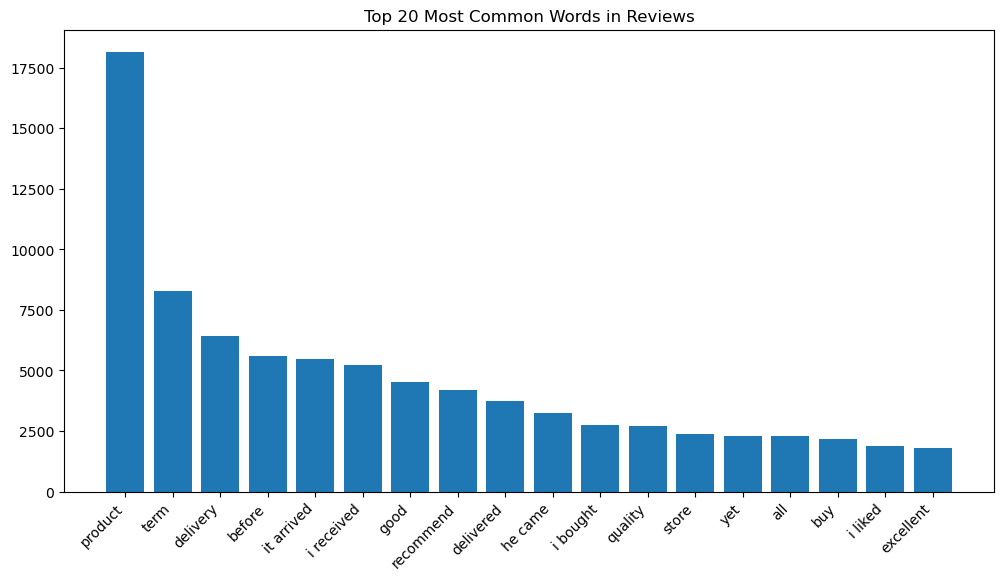

In [11]:
# Visualize
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_en))
plt.title('Top 20 Most Common Words in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
# tqdm.pandas()

# df_reviews['sentiment_score'] = df_reviews['cleaned_review'].apply(get_sentiment) 
# df_reviews['sentiment'] = df_reviews['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')) # forced to stop after 110 minutes


In [13]:
df_reviews.head(3)

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,


In [14]:
data_exploration(df_reviews)

Number of rows: 99224
Number of columns: 10
Number of duplicates: 0

Numerical Columns: Index(['score'], dtype='object')

Categorical Columns: Index(['review_id', 'order_id', 'title', 'message', 'review_unique_id',
       'cleaned_review', 'emojis'],
      dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,review_id,object,99224,0,98410
1,order_id,object,99224,0,98673
2,score,int64,99224,0,5
3,title,object,99224,0,4527
4,message,object,99224,0,36159
5,creation_timestamp,datetime64[ns],99224,0,636
6,answer_timestamp,datetime64[ns],99224,0,98248
7,review_unique_id,object,99224,0,99224
8,cleaned_review,object,99224,0,32686
9,emojis,object,99224,0,124


Run Hugging Face's API locally, otherwise, it will take 10 days to run.

In [22]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path) # run this code takes 5-8 s

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [33]:
df_sentiment = df_reviews.copy()

In [34]:
# df_sentiment['sentiment_task'] = df_sentiment['cleaned_review'].apply(lambda x: sentiment_task(x)[0]) # run 1000 samples takes 1 min. Run df_reviews takes 107 minutes

In [36]:
df_sentiment.head(3)

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,,"{'label': 'neutral', 'score': 0.47364354133605..."
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,,"{'label': 'neutral', 'score': 0.47364354133605..."
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,,"{'label': 'neutral', 'score': 0.47364354133605..."


In [37]:
# Split the sentiment_task column to get the sentiment value
df_sentiment['sentiment_label'] = df_sentiment['sentiment_task'].apply(lambda x: x['label'])
df_sentiment['sentiment_score'] = df_sentiment['sentiment_task'].apply(lambda x: x['score'])

In [38]:
df_sentiment.head()

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task,sentiment_label,sentiment_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,,"{'label': 'neutral', 'score': 0.6480153799057007}",neutral,0.648015
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,,"{'label': 'positive', 'score': 0.8807154893875...",positive,0.880715


Save to a new csv file

In [39]:
df_sentiment.to_csv('../../data/cleaned/sentiment_analysis.csv')

In [41]:
df_sentiment['sentiment_label'].value_counts()

sentiment_label
neutral     72707
positive    20159
negative     6358
Name: count, dtype: int64

#### Re-do sentiment analysis after drop '0'

In [43]:
df_reviews_without_0 = df_reviews[df_reviews['cleaned_review'] != '0'].reset_index()

In [45]:
df_reviews_without_0.drop(columns='index')

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,8670d52e15e00043ae7de4c01cc2fe06_b9bf720beb4ab...,aparelho eficiente site marca aparelho impress...,
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,0,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,4b49719c8a200003f700d3d986ea1a19_9d6f15f95d01e...,pouco travandopelo valor ta boa,
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,3948b09f7c818e2d86c9a546758b2335_e51478e7e277a...,vendedor confiável produto ok entrega antes prazo,
...,...,...,...,...,...,...,...,...,...,...
40971,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,0,para este produto recebi de acordo com a compr...,2017-11-29,2017-11-30 15:52:51,98fffa80dc9acbde7388bef1600f3b15_d398e9c82363c...,produto recebi acordo compra realizada,
40972,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,0,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23,df5fae90e85354241d5d64a8955b2b09_509b86c65fe4e...,entregou dentro prazo produto chegou condições...,
40973,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,0,"O produto não foi enviado com NF, não existe v...",2018-05-19,2018-05-20 21:51:06,a709d176f59bc3af77f4149c96bae357_d5cb12269711b...,produto enviado nf existe venda nf certeza fic...,
40974,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,0,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,b3de70c89b1510c4cd3d0649fd302472_55d4004744368...,excelente mochila entrega super rápida super r...,


In [46]:
df_sentiment_without_0 = df_reviews_without_0.copy()

In [47]:
# df_sentiment_without_0['sentiment_task'] = df_sentiment_without_0['cleaned_review'].apply(lambda x: sentiment_task(x)[0]) # run this takes 54 minutes

In [49]:
df_sentiment_without_0.head(3)

,index,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task
0,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,,"{'label': 'neutral', 'score': 0.6480153799057007}"
1,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,,"{'label': 'positive', 'score': 0.8807154893875..."
2,9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,8670d52e15e00043ae7de4c01cc2fe06_b9bf720beb4ab...,aparelho eficiente site marca aparelho impress...,,"{'label': 'neutral', 'score': 0.8199418783187866}"


In [50]:
# Split the sentiment_task column to get the sentiment value
df_sentiment_without_0['sentiment_label'] = df_sentiment_without_0['sentiment_task'].apply(lambda x: x['label'])
df_sentiment_without_0['sentiment_score'] = df_sentiment_without_0['sentiment_task'].apply(lambda x: x['score'])

In [52]:
df_sentiment_without_0 = df_sentiment_without_0.drop(columns='index')

In [53]:
df_sentiment_without_0.head(3)

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task,sentiment_label,sentiment_score
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,,"{'label': 'neutral', 'score': 0.6480153799057007}",neutral,0.648015
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,,"{'label': 'positive', 'score': 0.8807154893875...",positive,0.880715
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,8670d52e15e00043ae7de4c01cc2fe06_b9bf720beb4ab...,aparelho eficiente site marca aparelho impress...,,"{'label': 'neutral', 'score': 0.8199418783187866}",neutral,0.819942


Save to a new csv file

In [54]:
df_sentiment_without_0.to_csv('../../data/cleaned/sentiment_analysis_without_0.csv')

In [55]:
df_sentiment_without_0['sentiment_label'].value_counts()

sentiment_label
positive    20159
neutral     14459
negative     6358
Name: count, dtype: int64

In [79]:
df_sentiment[df_sentiment['cleaned_review'] != '0']['sentiment_label'].value_counts()

sentiment_label
positive    20159
neutral     14459
negative     6358
Name: count, dtype: int64

## Emotion Detection

In [56]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base") # run this takes 49 s

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gebruiker\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-pa

In [65]:
from transformers import pipeline
model_path = "j-hartmann/emotion-english-distilroberta-base"
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True) # run this takes 0.5 s

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [66]:
df_sentiment = df_sentiment.copy()

In [67]:
df_sentiment.head(3)

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task,sentiment_label,sentiment_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644


In [69]:
df_samples = df_sentiment.sample(100)

In [70]:
df_samples['emotion_task'] = df_samples['cleaned_review'].apply(lambda x: classifier(x)[0]) # for 100 rows, it takes 4 s

In [71]:
# df_sentiment['emotion_task'] = df_sentiment['cleaned_review'].apply(lambda x: classifier(x)[0])  # run this takes 64 min 43 s

In [72]:
df_sentiment.head(3)

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task,sentiment_label,sentiment_score,emotion_task
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644,"[{'label': 'anger', 'score': 0.031437199562788..."
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644,"[{'label': 'anger', 'score': 0.031437199562788..."
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644,"[{'label': 'anger', 'score': 0.031437199562788..."


In [75]:
df_sentiment['emotion_task'][0]

[{'label': 'anger', 'score': 0.03143719956278801},
 {'label': 'disgust', 'score': 0.02776300348341465},
 {'label': 'fear', 'score': 0.015807630494236946},
 {'label': 'joy', 'score': 0.005941898096352816},
 {'label': 'neutral', 'score': 0.8145654797554016},
 {'label': 'sadness', 'score': 0.04942969232797623},
 {'label': 'surprise', 'score': 0.055055052042007446}]

In [76]:
df_sentiment['emotion_label'] = df_sentiment['emotion_task'].apply(lambda x: max(x, key=lambda y: y['score'])['label'])
df_sentiment['emotion_score'] = df_sentiment['emotion_task'].apply(lambda x: max(x, key=lambda y: y['score'])['score'])

In [77]:
df_sentiment.head()

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task,sentiment_label,sentiment_score,emotion_task,emotion_label,emotion_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644,"[{'label': 'anger', 'score': 0.031437199562788...",neutral,0.814565
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644,"[{'label': 'anger', 'score': 0.031437199562788...",neutral,0.814565
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,,"{'label': 'neutral', 'score': 0.47364354133605...",neutral,0.473644,"[{'label': 'anger', 'score': 0.031437199562788...",neutral,0.814565
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,,"{'label': 'neutral', 'score': 0.6480153799057007}",neutral,0.648015,"[{'label': 'anger', 'score': 0.191435053944587...",neutral,0.565272
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,,"{'label': 'positive', 'score': 0.8807154893875...",positive,0.880715,"[{'label': 'anger', 'score': 0.118214100599288...",neutral,0.322297


Save to sentiment_analysis.csv 

In [118]:
df_sentiment.to_csv('../../data/cleaned/sentiment_analysis.csv', index=False)

In [81]:
df_sentiment['emotion_label'].value_counts()

emotion_label
neutral     89523
anger        4914
fear         2183
surprise     1082
joy           869
disgust       578
sadness        75
Name: count, dtype: int64

In [82]:
df_sentiment[df_sentiment['cleaned_review'] != '0']['emotion_label'].value_counts()

emotion_label
neutral     31275
anger        4914
fear         2183
surprise     1082
joy           869
disgust       578
sadness        75
Name: count, dtype: int64

#### Re-do emotion detection for cleaned_review != '0'

In [83]:
df_sentiment_without_0 = df_sentiment[df_sentiment['cleaned_review'] != '0'].copy()

In [84]:
df_sentiment_without_0.shape

(40976, 16)

In [85]:
df_sentiment_without_0['emotion_task'] = df_sentiment_without_0['cleaned_review'].apply(lambda x: classifier(x)[0]) # run this takes 35 min

In [87]:
df_sentiment_without_0['emotion_label'] = df_sentiment_without_0['emotion_task'].apply(lambda x: max(x, key=lambda y: y['score'])['label'])
df_sentiment_without_0['emotion_score'] = df_sentiment_without_0['emotion_task'].apply(lambda x: max(x, key=lambda y: y['score'])['score'])

In [88]:
df_sentiment_without_0

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis,sentiment_task,sentiment_label,sentiment_score,emotion_task,emotion_label,emotion_score
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,,"{'label': 'neutral', 'score': 0.6480153799057007}",neutral,0.648015,"[{'label': 'anger', 'score': 0.191435053944587...",neutral,0.565272
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,,"{'label': 'positive', 'score': 0.8807154893875...",positive,0.880715,"[{'label': 'anger', 'score': 0.118214100599288...",neutral,0.322297
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,8670d52e15e00043ae7de4c01cc2fe06_b9bf720beb4ab...,aparelho eficiente site marca aparelho impress...,,"{'label': 'neutral', 'score': 0.8199418783187866}",neutral,0.819942,"[{'label': 'anger', 'score': 0.042143896222114...",neutral,0.653305
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,0,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,4b49719c8a200003f700d3d986ea1a19_9d6f15f95d01e...,pouco travandopelo valor ta boa,,"{'label': 'neutral', 'score': 0.5045055747032166}",neutral,0.504506,"[{'label': 'anger', 'score': 0.013849641196429...",neutral,0.728567
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,3948b09f7c818e2d86c9a546758b2335_e51478e7e277a...,vendedor confiável produto ok entrega antes prazo,,"{'label': 'positive', 'score': 0.4898809194564...",positive,0.489881,"[{'label': 'anger', 'score': 0.183230236172676...",neutral,0.385375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,0,para este produto recebi de acordo com a compr...,2017-11-29,2017-11-30 15:52:51,98fffa80dc9acbde7388bef1600f3b15_d398e9c82363c...,produto recebi acordo compra realizada,,"{'label': 'neutral', 'score': 0.8498357534408569}",neutral,0.849836,"[{'label': 'anger', 'score': 0.067906871438026...",neutral,0.763274
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,0,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23,df5fae90e85354241d5d64a8955b2b09_509b86c65fe4e...,entregou dentro prazo produto chegou condições...,,"{'label': 'positive', 'score': 0.7853269577026...",positive,0.785327,"[{'label': 'anger', 'score': 0.279731303453445...",neutral,0.487398
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,0,"O produto não foi enviado com NF, não existe v...",2018-05-19,2018-05-20 21:51:06,a709d176f59bc3af77f4149c96bae357_d5cb12269711b...,produto enviado nf existe venda nf certeza fic...,,"{'label': 'neutral', 'score': 0.8454113602638245}",neutral,0.845411,"[{'label': 'anger', 'score': 0.048582643270492...",neutral,0.754935
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,0,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,b3de70c89b1510c4cd3d0649fd302472_55d4004744368...,excelente mochila entrega super rápida super r...,,"{'label': 'positive', 'score': 0.851360023021698}",positive,0.851360,"[{'label': 'anger', 'score': 0.208930522203445...",fear,0.330679


Save to csv file.

In [117]:
df_sentiment_without_0.to_csv('../../data/cleaned/sentiment_analysis_without_0.csv', index=False)

## Create a words cloud

In [91]:
# Combine all reviews into a single string
text = ' '.join(df_reviews['cleaned_review'])

In [93]:
# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

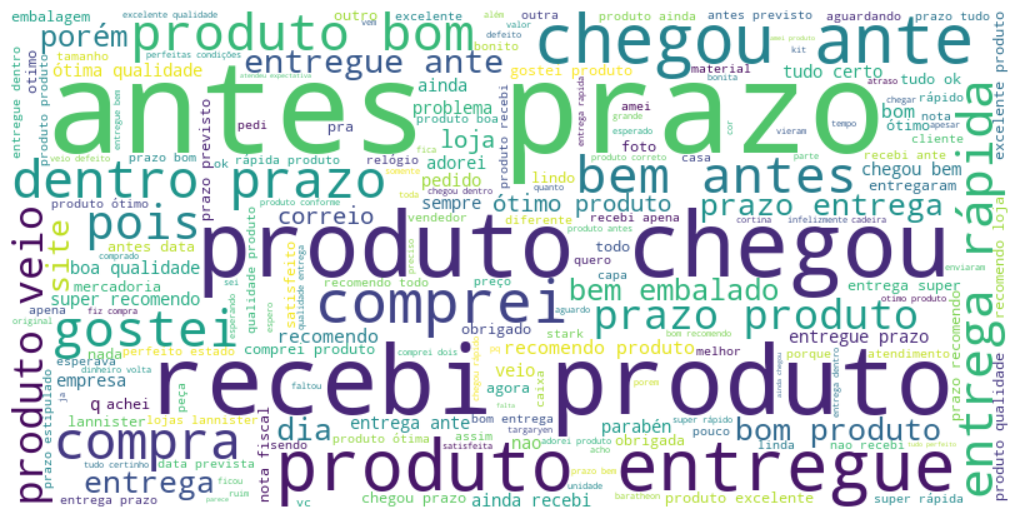

In [94]:
# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

English version

In [96]:
# words = text.split()

In [113]:
# # Load model directly
# from transformers import MarianMTModel, MarianTokenizer


# model_name = "Helsinki-NLP/opus-mt-pt-en"
# tokenizer = MarianTokenizer.from_pretrained(model_name)
# model = MarianMTModel.from_pretrained(model_name)
# translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))

In [114]:
# pipe = pipeline("translation", model="facebook/nllb-200-distilled-600M")

In [106]:
df_samples = df_sentiment_without_0.sample(100)

In [115]:
# df_samples['messages_EN'] = df_samples['cleaned_review'].apply(lambda x: pipe(x)[0]) # for 100 rows, it takes 

## Import csv files to MySQL

Connect with MySQL

In [119]:
# Load environment variables from .env file
load_dotenv()

# Access the password
password = os.getenv('mySQL_password')

database = "mydb"
connection_string = 'mysql+pymysql://root:' + password + '@localhost/'+ database
engine = create_engine(connection_string)

In [ ]:
df_sentiment = pd.read_csv('../../data/cleaned/sentiment_analysis.csv')
df_sentiment.to_sql('sentiment_analysis', con=engine, index=False, if_exists='append')